# Tasks 2020
### [ Machine Learning and Statistics Module GMIT 2020 ]
---

Below are my solutions to the Task assessment.

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents
* [Task 1](#task1)
    * [Test of the function](#Test_of_the_function1)
* [Task 2](#task2)
    * [Test of the function](#Test_of_the_function2)
* [Task 3](#task3)
    * [Test of the function](#Test_of_the_function3)
* [Task 4](#task4)
    * [Test of the function](#Test_of_the_function4)

---

### __TASK 1__: Calculate square root of 2 to 100 decimal places <a name="task1"></a>

<img align="left" width="200" height="200" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/A_First_Letter_Square_root_of_2.svg/1280px-A_First_Letter_Square_root_of_2.svg.png">


To calculate the square root, we can use _Digit-by-digit calculation of principal roots of decimal numbers_ [1] with binary shift operations [2].

$$ x_n = x + floor(\frac{a}{x}) >> 1 $$

The above approach finds an **integer** of the square root of $a$ to $n$ number of digits (in order to override limitation of floating point precision in Python).

For this to work we need to consider $a$ as below [3]:

$$ a = a * (10^{2*n})$$

After we have recieved the integer of the square root we covert it so we can place the decimal point at the right location [4]

> 1. Wikipedia: Methods of computing square roots: https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Decimal_(base_10)
2. Wikipedia: Integer square root: https://en.wikipedia.org/wiki/Integer_square_root#Digit-by-digit_algorithm
3. The On-Line Encyclopedia of Integer Sequences: Prime sieve of the square root of 2: https://oeis.org/A248831
4. Stack Overflow: How to add commas at required positions in the given string: https://stackoverflow.com/questions/47751102/how-to-add-commas-at-required-positions-in-the-given-string-in-python

In [1]:
def sqrt2(a=2, digits=100):
    """
    Function that calculates a square root of 2 to 100 decimal places
    """
    # Raising 2 in order to get an integer instead of a float in the result
    a = a * (10**(2*digits))
    x = 0
    # Initial guess for the root
    x_next = 1 * (10**digits)
    # Loop until it reaches requested number of digits
    while x != x_next:
        x = x_next
        # Calculate a better guess for the square root and shift the result one diggit to the right
        x_next = (x + (a // x)) >> 1
    # Converting integer to a list
    x_next = list(str(x_next))
    # Add the decimal point at the correct location
    for i, j in enumerate([1]):
         x_next.insert(i + j, '.')
    # Join list into one string
    print(''.join(x_next))

<br>

#### Test of the function <a name="Test_of_the_function1"></a>
Below is the test of the above function.

In [2]:
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


***

<br>

### __TASK 2__: Verify the Chi-squared value <a name="task2"></a>

<br>

<img align="left" width="150" height="150" src="https://images-na.ssl-images-amazon.com/images/I/61B6FqgRKJL.png">

<br>

Consider the table below:

 * | A | B | C | D | total
:-- | :-- | :-- | :-- | :-- | :--
White collar | 90 | 60 | 104 | 95 | 349
Blue collar	| 30 | 50 | 51 | 20 | 151
No collar | 30 | 40 | 45 | 35 | 150
Total | 150 | 150 | 200 | 150 | 650

_where A, B, C, and D are four neighbourhoods;_

_"white collar", "blue collar", or "no collar" are occupation of randomly selected 650 residents._

This is an example of Chi-squared test for categorical data. The Chi-squared value based on the above table is approximately 24.6. [1] In order to verify this value and calculate the associated p value I will be using a function from [scipy.stats package](https://docs.scipy.org/doc/scipy/reference/stats.html) that computes a Chi-square test of independence of variables in a contingency table. [2]

> 1. [Wikipedia: Chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test)
2. [SciPy: scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

<br>

#### General setup

In [3]:
# Efficient numerical arrays.
import numpy as np
# Data frames.
import pandas as pd
# Statistics.
import scipy.stats as ss
# Plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

In [4]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (15, 11)

<br>

#### Simulate the example table

In [5]:
# Create a raw data identical to the example.
raw_data = [['White collar', 90, 60, 104, 95, 349],
            ['Blue collar', 30, 50, 51, 20, 151],
            ['No collar', 30, 40, 45, 35, 150],
            ['Total', 150, 150, 200, 150, 650]]  

# Create a data frame. 
df = pd.DataFrame(raw_data, columns=[' ', 'A', 'B', 'C', 'D', 'Total'])

# Display the data frame.
df

,,A,B,C,D,Total
0,White collar,90,60,104,95,349
1,Blue collar,30,50,51,20,151
2,No collar,30,40,45,35,150
3,Total,150,150,200,150,650


<br>

#### Plot the data.

In [6]:
# Separate the data frame by collars:
wc = df.loc[df.loc[:, ' '] == 'White collar']
bc = df.loc[df.loc[:, ' '] == 'Blue collar']
nc = df.loc[df.loc[:, ' '] == 'No collar']
total = df.loc[df.loc[:, ' '] == 'Total']

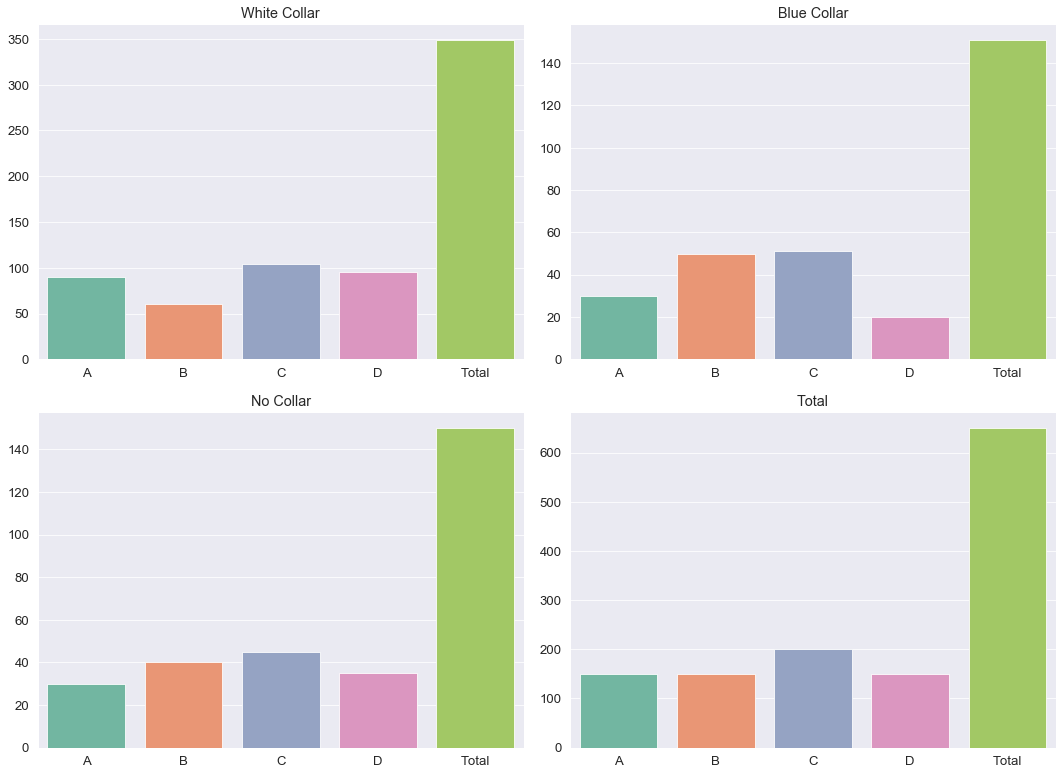

In [7]:
# Create 2x2 subplot.
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, sharey=False)

# Build a plot for White collar.
sns.barplot(data=wc, ax=ax1).set_title('White Collar')

# Build a plot for Blue collar.
sns.barplot(data=bc, ax=ax2).set_title('Blue Collar')

# Build a plot for No collar.
sns.barplot(data=nc, ax=ax3).set_title('No Collar')

# Build a plot for Total.
sns.barplot(data=total, ax=ax4).set_title('Total')

# Clean up whitespace padding.
fig.tight_layout()

# Display plots.
plt.show()

<br>

#### Perform Chi-square test

In [8]:
# Extract data from raw_data for each collar (dof = 6)
wc = raw_data[0][1:5]
bc = raw_data[1][1:5]
nc = raw_data[2][1:5]

# Create an array of observed data.
obs = np.array([wc,bc,nc])

# Run Chi-Square test.
chi_stat, p, dof, expctd = ss.chi2_contingency(obs)

In [9]:
print(f"Chi-squared value: {chi_stat}")
print(f"The associated p-value: {p}")

Chi-squared value: 24.5712028585826
The associated p-value: 0.0004098425861096696


#### Concussion

Based on the results of the test performed above the verification was successful and the Chi-squared value is approximately 24.6. Since the P-value (approximately 0.0004) and less than the significance level (0.5), it is statistically significant.

***

<br>
 
### __TASK 3__:  Standard deviation in Microsoft Excel: STDDEV.S vs  STDDEV.P <a name="task3"></a>

<br>

<img align="left" width="150" height="150" src="https://www.tech-recipes.com/wp-content/uploads/2019/05/excel.png">

Standard deviation is a measure of the amount of variation in a set of numbers compared to the mean (average) of the numbers. Microsoft Excel has total eight formaulas that related to standard deviation calculation. They are equally devided into two groups - _Population_ and _Sample_ - depending on whether they consider an entire data set (population) or just a sample of the data set. Thus, "S" in **STDEV.S** represents a sample and "P" in **STDDEV.P** - a population. [1] [2]

In order to demonstrate that STDEV.S is a better estimate for the standard deviation of a population when performed on a sample, I will compare STDEV.P and STDEV.S.
 
> 1. [Exceljet: Excel STDEV.P Function](https://exceljet.net/excel-functions/excel-stdev.p-function)
2. [Exceljet: Excel STDEV.S Function](https://exceljet.net/excel-functions/excel-stdev.s-function)

_EXAMPLE_

Let's consider the data set where 82 adults psychiatric patients hospitalized for depression. [3]

> 3. [Vincent Arel-Bundock's Github projects: R data sets: Data on Depression](https://vincentarelbundock.github.io/Rdatasets/doc/carData/Ginzberg.html)


<br>

#### General setup

In [10]:
# Import numpy
import numpy as np
# Working with data sets.
import pandas as pd
# Plotting. 
import matplotlib.pyplot as plt

In [11]:
# Colour scheme and styles for plots.
sns.set_theme(palette="cividis", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

<br>

#### Load the data set

In [12]:
# Load the data set.
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/Ginzberg.csv")

# Display it.
df

,Unnamed: 0,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518
...,...,...,...,...,...,...,...
77,78,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913
78,79,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443
79,80,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452
80,81,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153


In [13]:
# Check for empty values.
df["simplicity"].isnull().values.any()

False

In [14]:
df["depression"].isnull().values.any()

False

In [15]:
# Separate fatalism and depression columns.
f_d = df[["simplicity", "depression"]]
f_d.head()

,simplicity,depression
0,0.92983,0.59870
1,0.91097,0.72787
2,0.53366,0.53411
3,0.74118,0.56641
4,0.53366,0.50182


<br>

####  Plot the data

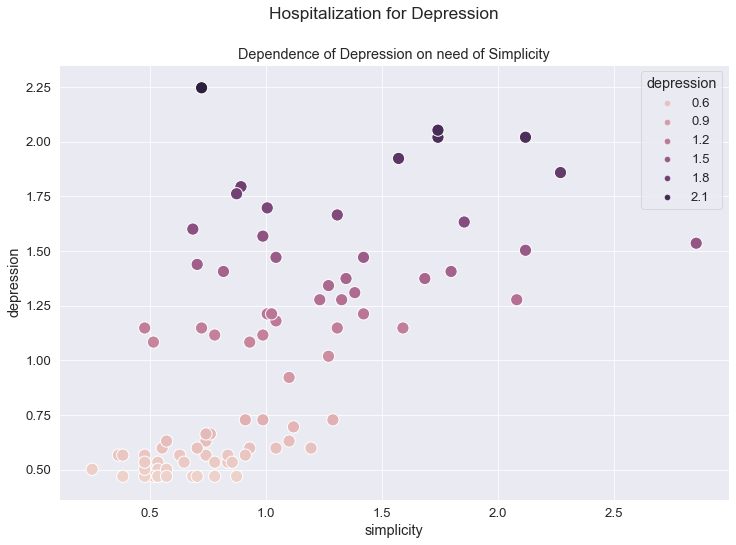

In [16]:
# Plot the data.
fig, ax = plt.subplots()
fig.suptitle("Hospitalization for Depression")
sns.scatterplot(x="simplicity", y="depression", data=f_d, ax=ax, hue="depression", s=150).set_title("Dependence of Depression on need of Simplicity")

# Display the plot.
plt.show()

<br>

#### Calculating Standard Deviation. 

<br>

The above data set is our population. We can calculate population standard deviation by using STDEV.P. Since it is taken as the standard deviation for every entry in the data set, even for minorities, it is called __Biased Analysis__.

In [17]:
# Simulate STDDEV.P formula.
STDEVP = np.sqrt(np.sum((f_d - np.mean(f_d))**2)/len(f_d))
STDEVP["depression"]

0.49694172152876204

In [18]:
# Simulate STDDEV.S formula 
STDEVS = np.sqrt(np.sum((f_d - np.mean(f_d))**2)/(len(f_d)-1))
STDEVS["depression"]

0.49999985329466384

In [19]:
STDEVP["depression"] < STDEVS["depression"]

True

<br>

Now let's consider that from 82 patients we calculated simplicity and depression only for half of the patients.

In [20]:
# Select a sample of 41 patients
a = f_d.sample(n=41)
a

,simplicity,depression
12,0.68458,0.46953
45,0.98643,1.11539
29,0.85437,0.53411
32,0.57139,0.46953
53,0.77891,1.11539
34,1.28827,0.72787
21,0.70345,0.59870
67,1.57125,1.92272
38,0.47707,0.53411
80,1.42033,1.47061


The above sample is only a small fraction of the population. Therefore, the standard deviation using STDEV.P formula is going to be as inaccurate compared to the previous results.

In [21]:
# Perform STDDEV.P on a sample
STDEVP_on_sample = np.sqrt(np.sum((a - np.mean(a))**2)/(len(a)))
STDEVP_on_sample["depression"]

0.4761090027783462

<br> 

For this reason STDEV.S formula exists. It is used on a small sample of entire population implementing Bessel's correction *(n-1)* where n is a number of samples arguments. This is called __Non-biassed analysis__ of standard deviation. [4]

> 4. [Exceltip: How to use the STDEV.S Function in Excel](https://www.exceltip.com/statistical-formulas/how-to-use-stdev-s-function-in-excel.html)

In [22]:
# Simulate STDDEV.S formula 
STDEVS = np.sqrt(np.sum((a - np.mean(a))**2)/(len(a)-1))
STDEVS["depression"]

0.48202362710738156

<br>

#### Standard Deviation results. 

Considering the results above, now we can compare Standard deviation for depression. 

In [23]:
# check what is the closest number to STDEVP

list = [STDEVP_on_sample["depression"], STDEVS["depression"]]
closest_to_STDEVP = min(list, key=lambda x:abs(x-STDEVP["depression"]))
closest_to_STDEVP

0.48202362710738156

In [24]:
STDEVP_on_sample["depression"] == closest_to_STDEVP

False

In [25]:
STDEVS["depression"] == closest_to_STDEVP

True

<br>

#### Concustion.

